# House Price Exploratory Data Analysis

## Introduction

At this dataset we have a bunch of houses and their prices.
also we have a lot of properties for these houses,
we have **79 explanatory variables**,\
    what we are going to do is trying to understand the data and its pattern,
    also we want to get the right decision on this dataset like: 
    how I can clean this dataest,\
        should I have to make a outiler removal?,
        show how the features are correlated with each other

---

DATA FIELDS:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class ( Discrete )
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet (land of that building)
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

---


## Initial Setup

In [119]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# tools
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.model_selection import cross_val_score

# setting up the style for the plots
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# load the data
data = pd.read_csv('data/train.csv', index_col='Id')
# get feeling of the data
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


## Data Cleaning

In [121]:
# get the shape of the data
data.shape

(1460, 80)

In [122]:
# get the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Define some useful functions that help with the data cleaning process
- get_missing_count: give me a dataset with number of missing for each feature
- get_feature_stats: give me a dataset with missing count and the types of feature and
the percent of missing values for each feature

In [123]:
def get_missing_count(df):
    """
       computes the count of missing values
       for each feature
       -----
       return missing_count [DataFrame] 
    """
    missing_count = df.isnull().sum().rename('missing_count').reset_index().\
        rename(columns={'index':'feature'})
        
    return missing_count


def get_feature_stats(df, *, sort_by_feature='missing_precentage'):
    """ 
        get some useful statistics about the dataset
        number of missing, missing percentage for each feature 
        -----
        param: 
            df [DataFrame]
            sort_by_feature [str] order by specific feature
            
        -----
        return: data_stats [DataFrame] 
    """
    data_stats = get_missing_count(df)
    # compute the missing percenteage for each feature
    data_stats['missing_precentage'] = data_stats['missing_count'] / df.shape[0]
    # get the data type for each feature
    data_stats['feature_type'] = data.dtypes.rename('feature_type').values
    # get the features by a specific threshold
    data_stats = data_stats[data_stats['missing_precentage'] > 0]
    # sort the dataframe decending based on specific feature
    data_stats.sort_values(sort_by_feature, ascending=False, inplace=True)

    return data_stats

Show some information about the missing that the dataset has also the percentage of missing and the data type for each feature

In [124]:
# get statistics about the features and the features with missing values
data_missing_stats = get_feature_stats(data)
data_missing_stats

,feature,missing_count,missing_precentage,feature_type
71,PoolQC,1453,0.995205,object
73,MiscFeature,1406,0.963014,object
5,Alley,1369,0.937671,object
72,Fence,1179,0.807534,object
56,FireplaceQu,690,0.472603,object
2,LotFrontage,259,0.177397,float64
57,GarageType,81,0.055479,object
58,GarageYrBlt,81,0.055479,float64
59,GarageFinish,81,0.055479,object
62,GarageQual,81,0.055479,object


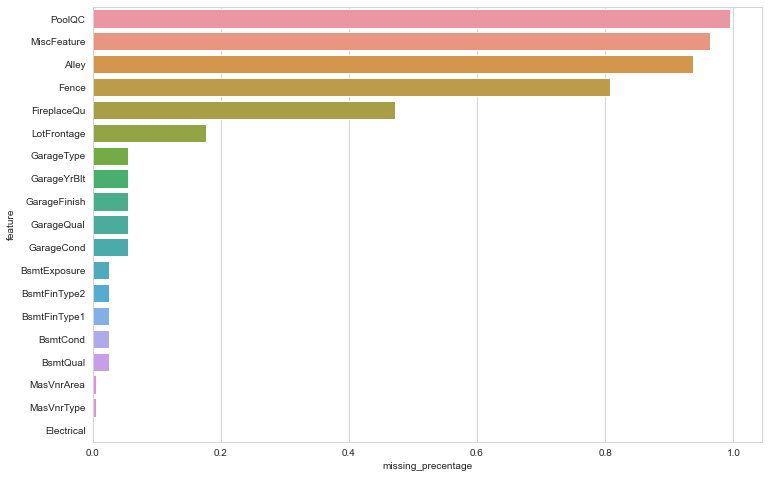

In [125]:
# visualize the missing percentage for each feature
plt.figure(figsize=(12,8))
sns.barplot(data=data_missing_stats, x='missing_precentage', y='feature')
plt.show()

Here I see that I have 5 features hold over 20% of missing values which are:
- PoolQC
- MiscFeature
- Alley
- Fence
- FireplaceQu
> All these features comes with 'Object' data type

### Handle Missing Values
Here I decided to **drop all features with more than 20%** of missing data,\
    Doing this decision will not make me lose a lot of data since these features contains alot of missing values,\
        and fill the other feature's values with data

In [126]:
# get the feature's names that I decided to remove from my dataset, and drop them
features_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
data.drop(columns=features_to_drop, axis='columns', inplace=True)
# also drop these features from the missing_values_stats dataframe 
data.shape

(1460, 75)

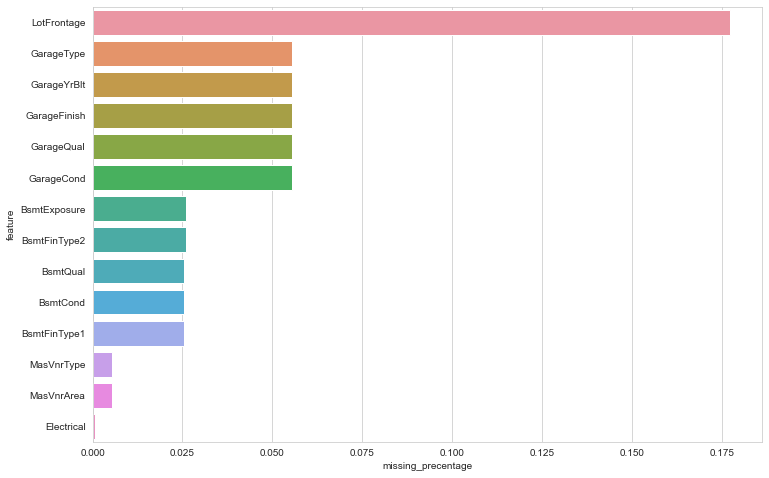

In [127]:
# get the missing stats information again and visualize them
data_missing_stats = get_feature_stats(data)
plt.figure(figsize=(12,8))
sns.barplot(data=data_missing_stats, x='missing_precentage', y='feature')
plt.show()

Now, I'm trying to find the best way to fill the missing at these features..

Doing some analysis for these features

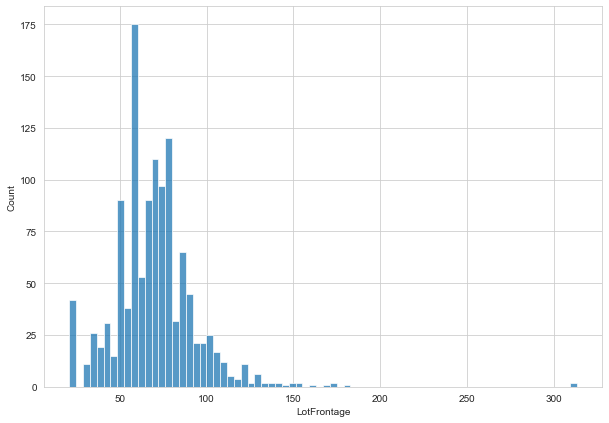

In [128]:
# visualize 'LotFrontage' feature
plt.figure(figsize=(10,7))
sns.histplot(data=data, x='LotFrontage')
plt.show()

In [129]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

I did notice here that the **LotFrontage** feature is close to be normal ( bell shape ),\
    since the mean and the median are almost equal. and its shape looks like bell-shape.\
        Which means that the data cluster in the middle

I decided to fill the missing of this feature by **the mean** of this feature

In [130]:
# filling the missing values with the MEAN
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

Discover the missing values with features that are related to the **Garage**

In [131]:
features_related_to_garage = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
# take a look about the missing values in the 
data[data['GarageType'].isnull()][features_related_to_garage]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
Id,,,,,
40,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1350,NaN,NaN,NaN,NaN,NaN
1408,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


I noticed here that **81 Houses** missed of the **GARAGE** information.

With my intution: The *YearBuilt* and *GarageYrBlt* are equal in a lot of observations.

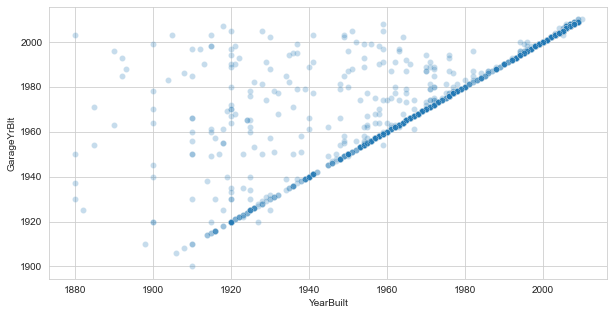

In [132]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='YearBuilt', y='GarageYrBlt', alpha=.25)
plt.show()

I noiced here that there is a **centralization**\
     and at this centralization we noticed here that there is **a linear correlation** between the **YearBuilt** and the **GarageYrBlt**,\
    So my decision would on the missing values in the *GarageYrBlt* is to fill the values ( Right filling )

In [133]:
# get the indices of the missing observations
indices_of_missing = data[data['GarageYrBlt'].isnull()]['GarageYrBlt'].index
# fill them with the same value of the YearBuilt
data.loc[indices_of_missing, 'GarageYrBlt'] = data.loc[indices_of_missing, 'YearBuilt'].values

There are a 81 one houses come with no Garage and we are going to fill them with a constant value

In [134]:
features_related_to_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
# fill the missing with NO word ( which means no garage)
for feature in features_related_to_garage:
    data[feature].fillna('NO', inplace=True)

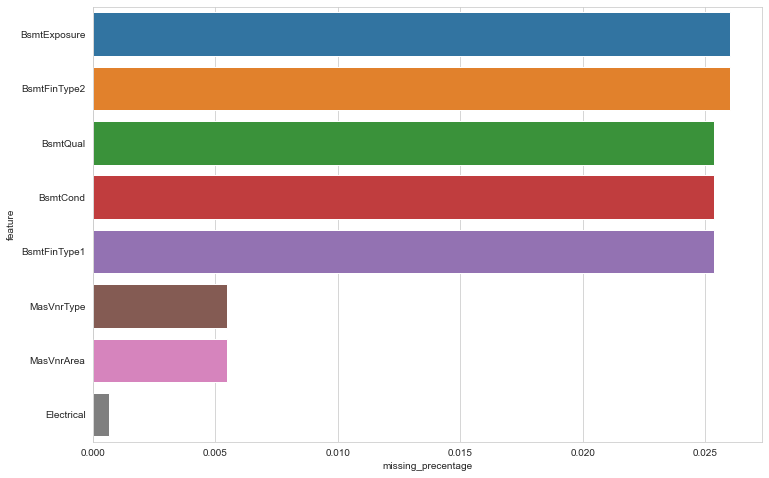

In [135]:
# get the missing stats information again and visualize them
data_missing_stats = get_feature_stats(data)
plt.figure(figsize=(12,8))
sns.barplot(data=data_missing_stats, x='missing_precentage', y='feature')
plt.show()

Handle the missing in Basement features

In [136]:
features_related_to_basement = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual']
# fill the missing with NO word ( which means no basement)
for feature in features_related_to_basement:
    data[feature].fillna('NO', inplace=True)

Still I have 3 features with low missing percentage:
- MasVnrType
- MasVnrArea
- Electrical

In [137]:
# get the missing stats information again and visualize them
data_missing_stats = get_feature_stats(data)
data_missing_stats

,feature,missing_count,missing_precentage,feature_type
23,MasVnrType,8,0.005479,object
24,MasVnrArea,8,0.005479,float64
40,Electrical,1,0.000685,object


In [138]:
# get the values and their frequency percentage
data['MasVnrType'].value_counts(normalize=True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

**None** value is the most frequent with **60%**

In [139]:
# get the values and their frequency percentage
data['MasVnrArea'].value_counts(normalize=True)

0.0      0.592975
180.0    0.005510
72.0     0.005510
108.0    0.005510
120.0    0.004821
           ...   
562.0    0.000689
89.0     0.000689
921.0    0.000689
762.0    0.000689
119.0    0.000689
Name: MasVnrArea, Length: 327, dtype: float64

**0** value is the most frequent with **60%**

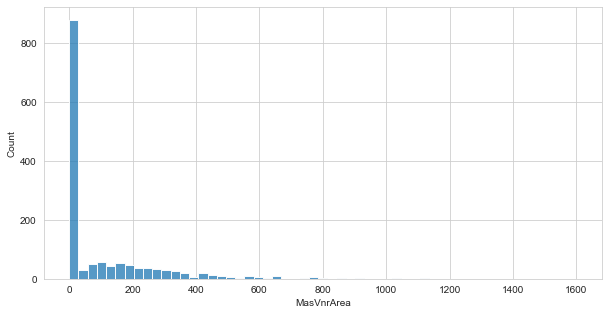

In [140]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='MasVnrArea')
plt.show()

OK, and this make sence, since **60%** of the houses with **no Masonry veneer**,\
    The area for **60%** of houses would be **0**.

My decision at this case is to fill the missing values with the **mode** for each feature

In [141]:
features_related_to_mas_vnr = ['MasVnrType', 'MasVnrArea']
# fill the missing with mode ( most frequance value)
for feature in features_related_to_mas_vnr:
    # get the mode
    mode_of_feature = data[feature].mode()[0]
    data[feature].fillna(mode_of_feature, inplace=True)

In [142]:
# get the missing stats information again and visualize them
data_missing_stats = get_feature_stats(data)
data_missing_stats

,feature,missing_count,missing_precentage,feature_type
40,Electrical,1,0.000685,object


In [143]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

Since I have one house with missing one value in **Electrical** feature I could fill this value with the **mode**.

In [144]:
# fill the missed value with the mode of this feature
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

In [145]:
# get the missing stats information again and visualize them
data_missing_stats = get_feature_stats(data)
data_missing_stats

,feature,missing_count,missing_precentage,feature_type


Now, I have a dataset without missing values :)

## Feature Exploration

In [146]:
# get some descriptive statistics about the target
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

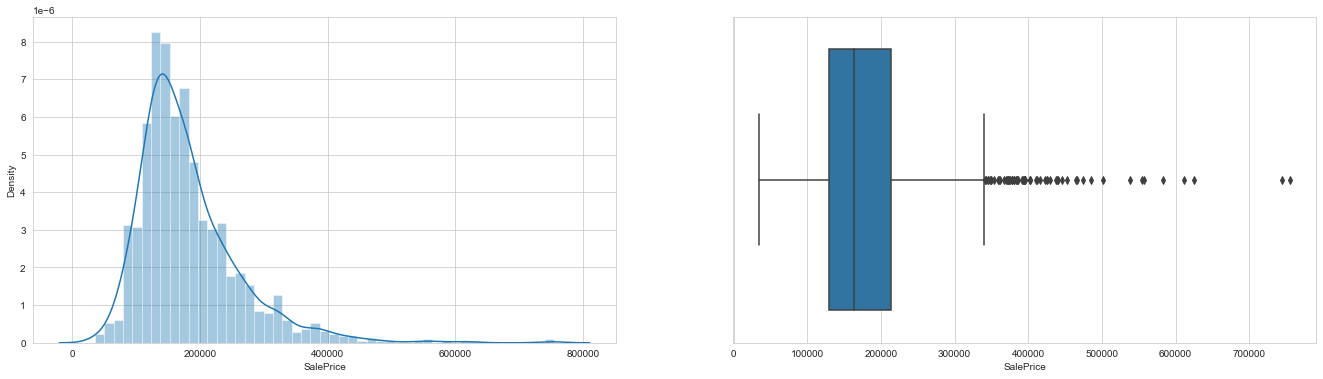

In [147]:
# visualize the distribution
# plt.figure(figsize=(12,6))
fig, ax = plt.subplots(1,2, figsize=(23,6))
sns.distplot(data["SalePrice"],ax=ax[0])
sns.boxplot(data["SalePrice"], ax=ax[1])
fig.show()

Here I noticed that the distribution of the target variable 'SalePrice' is **slightly right skewed**,
and there is outlires above **340K**, \
    I decided to keep the outlier because the data is small relatively

Start exploring the features

In [148]:
# get statistical description for the numeric features
data.describe(include='number')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


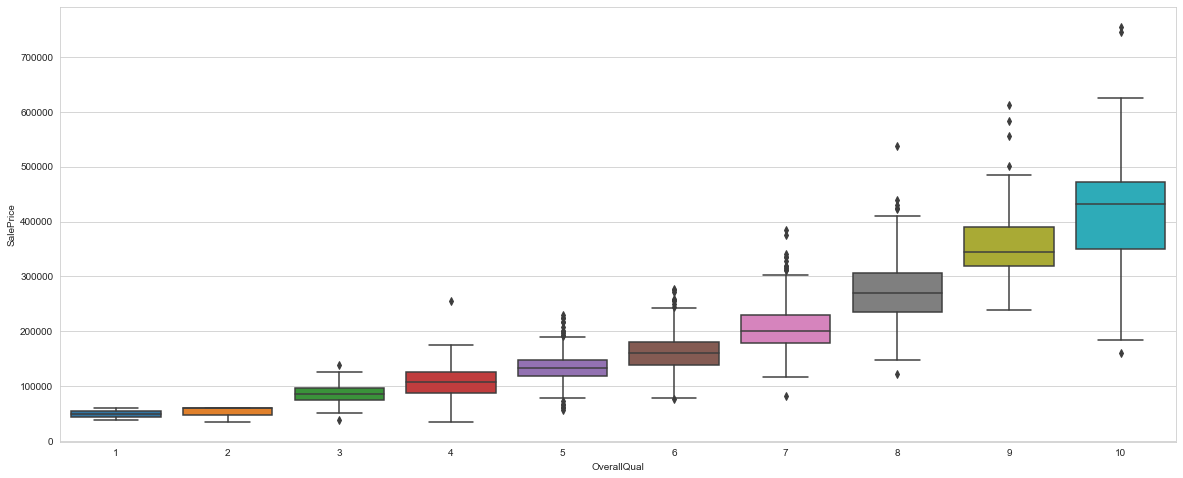

In [149]:
# visualize the distribution for houses quality
plt.figure(figsize=(20,8))
sns.boxplot(data=data, x='OverallQual', y='SalePrice')
plt.show()

> OverallQuali: is about the quality of the house

+ The distribution of the houses with quality 10 is the **bigest one**, \
    this means there are another features affect on the houses' price.
+ almost **%25** of the houses that come with quality 10 is more expensive than all houses
+ Houses that come with quality 1, 2, 3, 4 are **cheaper** than the houses that come with qualit 10.
+ Houses that come with quality **from 1 to 6** their price is less than **300K**
        

In [150]:
# get the correlation between the SalePrice and OverallQual
data[['OverallQual', 'SalePrice']].corr()['SalePrice'][0]

0.7909816005838053

This means that **79%** of the increase in the house price is due to increase in the quality of the house

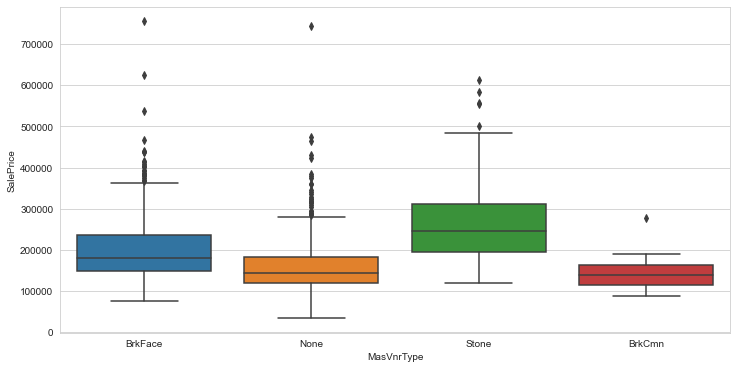

In [151]:
# visualize the distribution for the Masonry veneer types
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='MasVnrType', y='SalePrice')
plt.show()

**Masonry veneer** is a construction material used on the exterior walls of homes and commercial buildings.

+ The price for almost all houses that used **BrkCmn** in their construction are less than **200K**
+ Almost **25%** of the houses that used **Stone** as Masonry Veneer are more expensive than all houses

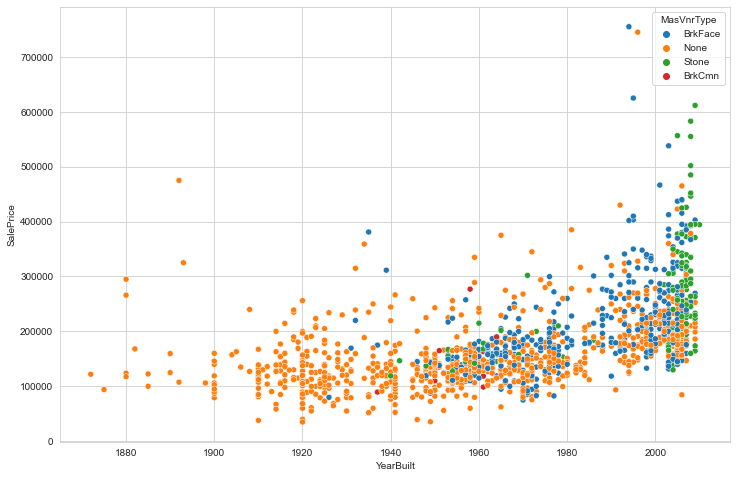

In [152]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='YearBuilt', y='SalePrice', hue='MasVnrType')
plt.show()

Almost all houses that were built before **1940** *don't have* Masonry Veneer in construction.

+ **Common Bricks** are low quality, useful for internal walls which will not be seen
+ **Facing Bricks** are of high quality and uniform appearance

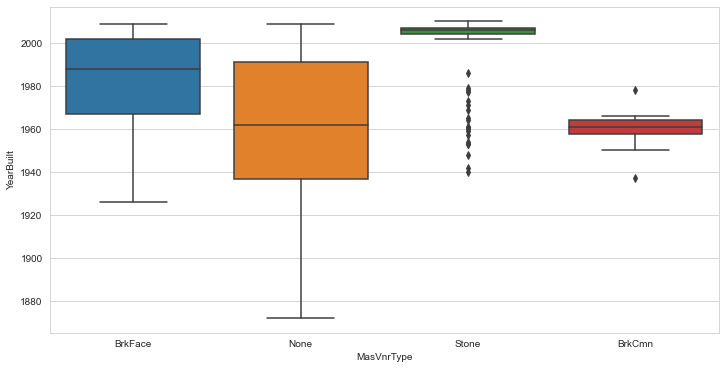

In [153]:
# visualize the distribution for the Masonry veneer types
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='MasVnrType', y='YearBuilt')
plt.show()

+ houses starts using **BrkFace** in their constructions since **1920**,\
    and **BrkCmn** from 1935 to 1980 and not used any more after 80s.

In [154]:
# description statistics on categories data
data.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


## Feature Engineering

### Feature Selection

I decided to select the features that have *correlation* above **35%** with the target ( SalePrice )

In [155]:
# get the numeric features
numeric_features = data.select_dtypes(exclude='object').columns
corr_matrix = data[numeric_features].corr()['SalePrice']
# get the features that have correlation more than 35%
high_correlated = list(corr_matrix[corr_matrix > .35].index)

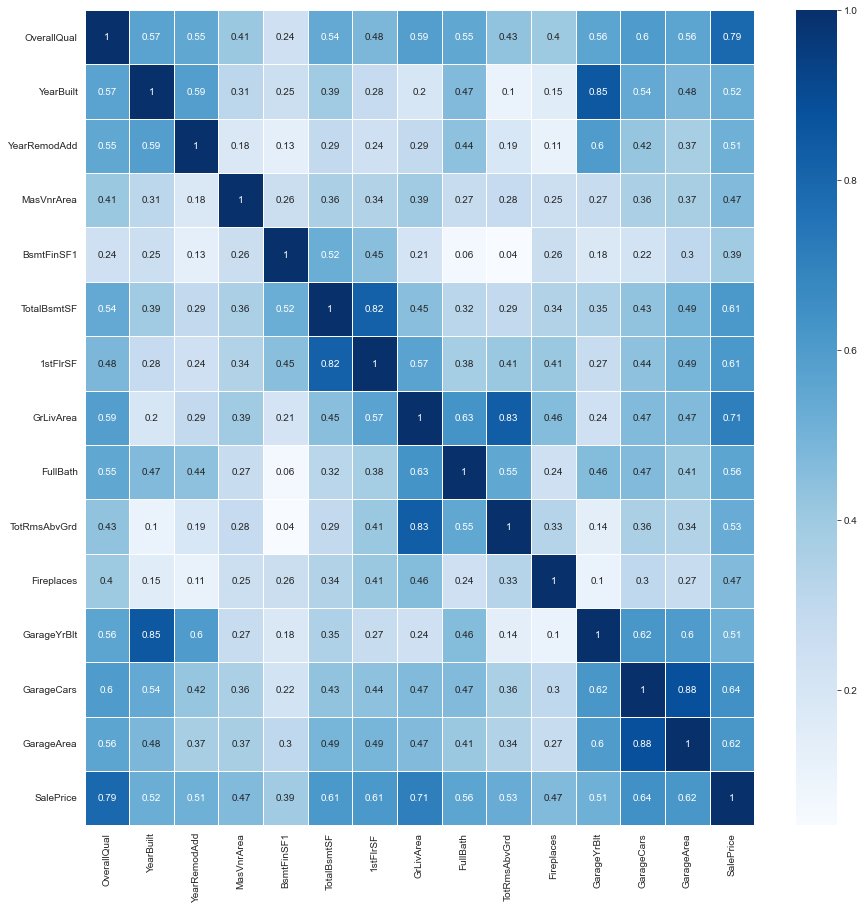

In [156]:
# heatmap with for the correlation matrix
plt.figure(figsize=(15,15))
corr_matrix = data[high_correlated].corr().round(2)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='Blues')
plt.show()

### Train-Test Split

split the data into train and test and the preprocessing only for the train data.

In [157]:
# get the categorica features
categorical_features = list(data.select_dtypes(include='object').columns)[:5]
# combine the numeric and categorical features
selected_features = categorical_features + high_correlated

In [158]:
# split the data into two parts ( test and train ) before preprocessing phase
X = data[selected_features].drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=2)

+ Feature scaling, by the Normalization \
    Scale the Numeric features using **MinMaxScaler**
+ **One Hot Encoding** for the categorical features

In [159]:
scaler = MinMaxScaler()
ohe = OneHotEncoder(drop='first', sparse=False)
# get numeric cols from the training data
numeric_cols = X_train.select_dtypes(exclude='object').columns
# get the categorical cols from the train
categorical_cols = X_train.select_dtypes(include='object').columns
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', ohe, categorical_cols),
        ('numerical', scaler, numeric_cols)
    ]
)

# fit and transform the train data ( catigorical and numerical )
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
# get and set the new feature names after scaling and encoding
new_feature_names = preprocessor.get_feature_names_out(preprocessor.feature_names_in_)
X_train.columns = new_feature_names
X_train.head()

,categorical__MSZoning_FV,categorical__MSZoning_RH,categorical__MSZoning_RL,categorical__MSZoning_RM,categorical__Street_Pave,categorical__LotShape_IR2,categorical__LotShape_IR3,categorical__LotShape_Reg,categorical__LandContour_HLS,categorical__LandContour_Low,...,numerical__BsmtFinSF1,numerical__TotalBsmtSF,numerical__1stFlrSF,numerical__GrLivArea,numerical__FullBath,numerical__TotRmsAbvGrd,numerical__Fireplaces,numerical__GarageYrBlt,numerical__GarageCars,numerical__GarageArea
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.162296,0.203273,0.208352,0.171063,0.333333,0.333333,0.333333,0.731884,0.50,0.372355
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.203402,0.187889,0.186783,0.153353,0.333333,0.333333,0.000000,0.630435,0.25,0.473907
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.045535,0.139935,0.119550,0.186134,0.666667,0.333333,0.333333,0.739130,0.50,0.310296
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.172927,0.301800,0.346489,0.284476,0.666667,0.416667,0.333333,0.963768,0.50,0.437236
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.066442,0.120295,0.122763,0.166541,0.333333,0.333333,0.333333,0.949275,0.50,0.310296


## Model Selection

### Hyperparameter Tuning

In [160]:
# prepare the models
rf = RandomForestRegressor()
gbt = GradientBoostingRegressor()
knn = KNeighborsRegressor()
lr = Ridge()

Hyperparameter Tuning for **RandomForest**

In [161]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [162]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

rf_random_grid = {
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap
                }

pprint(rf_random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [163]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, # the base model
                                param_distributions = rf_random_grid, # grid of hyper parameters
                                n_iter = 3, # number of combinations of random hyper parameters to choose
                                cv = 3,# # 3-fold
                                verbose=1, # print some logs while evaluating the different combinations
                                random_state=42,
                                n_jobs = 1) # use all cores in the machine to train (parallel)
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [164]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [165]:
# get the best score for the best estimator
rf_random.best_score_

0.8331789695074688

In [166]:
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=new_feature_names)

In [167]:
best_rf = rf_random.best_estimator_
best_rf.score(X_test, y_test)

0.8869613157372572

Hyperparameter tuning for **GradientBoostingTrees**

In [168]:
# hyperparameters for GBT
pprint(gbt.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [169]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 74, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 7]
# Method of selecting samples for training each tree
learning_rate = [0.01, 0.1]


gbt_random_grid = {
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'learning_rate': learning_rate
                 }

pprint(gbt_random_grid)

{'learning_rate': [0.01, 0.1],
 'max_depth': [5, 12, 20, 28, 35, 43, 51, 58, 66, 74, None],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [5, 10, 16],
 'n_estimators': [100, 200, 300, 400, 500]}


In [170]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
gbt_random = RandomizedSearchCV(estimator = gbt, # the base model
                                param_distributions = gbt_random_grid, # grid of hyper parameters
                                n_iter = 3, # number of combinations of random hyper parameters to choose
                                cv = 3,# # 3-fold
                                verbose=1, # print some logs while evaluating the different combinations
                                random_state=42,
                                n_jobs = 1) # use all cores in the machine to train (parallel)
gbt_random

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=3,
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [171]:
gbt_random.fit(X_train, y_train)
print('Best Score: ', gbt_random.best_score_)
# get the best estimator
best_gbt = gbt_random.best_estimator_
best_gbt.score(X_test, y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Score:  0.8205832631154956


0.873109504788698

In [172]:
best_gbt.score(X_test, y_test)

0.873109504788698

Hyperparamter Tuning for **KNN**

In [173]:
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [174]:
# Leaf size passed to BallTree or KDTree.
leaf_size = list(range(1,50))
# Number of neighbors to use
n_neighbors = list(range(1,30))

knn_random_grid = {
                'leaf_size': leaf_size,
                'n_neighbors': n_neighbors
                 }

In [175]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator = knn, # the base model
                                param_distributions = knn_random_grid, # grid of hyper parameters
                                n_iter = 3, # number of combinations of random hyper parameters to choose
                                cv = 3,# # 3-fold
                                verbose=1, # print some logs while evaluating the different combinations
                                random_state=42,
                                n_jobs = 1) # use all cores in the machine to train (parallel)
knn_random

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29]},
                   random_state=42, verbose=1)

In [176]:
knn_random.fit(X_train, y_train)
print('Best Score: ', knn_random.best_score_)
# get the best estimator
best_knn = knn_random.best_estimator_
best_knn.score(X_test, y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Score:  0.7027512607626513


0.7247278906388357

Hyperparameters Tuning for **Ridge**

In [177]:
pprint(lr.get_params())

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


In [178]:
# learning rate
alpha = [0.001, 0.01, 0.1]


lr_random_grid = {
                'alpha': alpha
                 }

pprint(lr_random_grid)

{'alpha': [0.001, 0.01, 0.1]}


In [179]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator = lr, # the base model
                                param_distributions = lr_random_grid, # grid of hyper parameters
                                n_iter = 3, # number of combinations of random hyper parameters to choose
                                cv = 3,# # 3-fold
                                verbose=1, # print some logs while evaluating the different combinations
                                random_state=42,
                                n_jobs = 1) # use all cores in the machine to train (parallel)
lr_random

RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=3, n_jobs=1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1]},
                   random_state=42, verbose=1)

In [180]:
lr_random.fit(X_train, y_train)
print('Best Score: ', lr_random.best_score_)
# get the best estimator
best_lr = lr_random.best_estimator_
best_lr.score(X_test, y_test)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Score:  0.7435948628069701


0.8463439309971985

In [181]:
results = {
    'RandomForest': rf_random.best_score_,
    'GradientBoostingTrees': gbt_random.best_score_,
    'K-NN': knn_random.best_score_,
    'LR-Ridge': lr_random.best_score_,
}

pprint(results)

{'GradientBoostingTrees': 0.8205832631154956,
 'K-NN': 0.7027512607626513,
 'LR-Ridge': 0.7435948628069701,
 'RandomForest': 0.8331789695074688}


The best score comes from the **RandomForest**

In [182]:
X = pd.DataFrame(preprocessor.transform(X), columns=new_feature_names)

In [183]:
scores = cross_val_score(best_rf, X, y, scoring='r2')
print('Scores: ', scores)
print('Average Score: ', scores.mean())

Scores:  [0.86243624 0.82421898 0.86316923 0.87824905 0.80366068]
Average Score:  0.8463468379548301


In [184]:
# train the model on the all data
best_rf.fit(X, y)

RandomForestRegressor(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

In [185]:
sample = pd.DataFrame(X_test.iloc[50]).T
sample

,categorical__MSZoning_FV,categorical__MSZoning_RH,categorical__MSZoning_RL,categorical__MSZoning_RM,categorical__Street_Pave,categorical__LotShape_IR2,categorical__LotShape_IR3,categorical__LotShape_Reg,categorical__LandContour_HLS,categorical__LandContour_Low,...,numerical__BsmtFinSF1,numerical__TotalBsmtSF,numerical__1stFlrSF,numerical__GrLivArea,numerical__FullBath,numerical__TotRmsAbvGrd,numerical__Fireplaces,numerical__GarageYrBlt,numerical__GarageCars,numerical__GarageArea
50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129872,0.205074,0.210877,0.173135,0.333333,0.25,0.333333,0.637681,0.25,0.248237


## Output

saving the model, the preprocessor, and the feature names

In [186]:
import pickle
dirname = './pickles/'
filename = 'model_v4.pkl'
path = dirname + filename
with open(path, 'wb') as f:
    pickle.dump(best_rf, f)

In [187]:
filename = 'preprocesser_v2.pkl'
path = dirname + filename
with open(path, 'wb') as f:
    pickle.dump(preprocessor, f)

In [188]:
import json
dataset_info = {
    # feautres in the training phase without the target
    'column_names': selected_features[:-1]
}
dirname = './data/'
filename = 'dataset_info.json'
path = dirname + filename
with open(path, 'w') as f:
    json.dump(dataset_info, f)